#Stock Price Prediction
### A Stock Trend Prediction Web App in Python using LSTM (Long Short-Term Memory) can predict future stock prices based on historical data by training an LSTM model. The app can utilize a web framework like Flask or Streamlit to provide an interactive interface for users to input stock symbols and view predicted trends.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
# import pandas_datareader as pdr

In [4]:
start = '2014-01-01'
end = '2024-12-27'
start,end


('2014-01-01', '2024-12-27')

In [5]:
df = yf.download('RELIANCE.NS',start,end)
df.to_csv('reliance.csv')
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,,
2014-01-01,177.844223,203.164734,205.324844,202.890427,205.141968,5849398
2014-01-02,175.082932,200.010284,204.810532,198.890228,202.913284,6023632
2014-01-03,172.931900,197.553009,199.633118,195.438614,199.233093,12833897
2014-01-06,171.071030,195.427185,197.324432,194.295700,197.061554,13315857
2014-01-07,168.499847,192.489899,196.570099,192.021301,195.347183,17311470
...,...,...,...,...,...,...
2024-12-19,1230.449951,1230.449951,1244.900024,1229.000000,1239.000000,14244653
2024-12-20,1205.300049,1205.300049,1239.500000,1201.500000,1224.000000,20312896


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2708 entries, 2014-01-01 to 2024-12-26
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   (Adj Close, RELIANCE.NS)  2708 non-null   float64
 1   (Close, RELIANCE.NS)      2708 non-null   float64
 2   (High, RELIANCE.NS)       2708 non-null   float64
 3   (Low, RELIANCE.NS)        2708 non-null   float64
 4   (Open, RELIANCE.NS)       2708 non-null   float64
 5   (Volume, RELIANCE.NS)     2708 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 148.1 KB


In [7]:
df= df.reset_index()
df

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
0,2014-01-01,177.844223,203.164734,205.324844,202.890427,205.141968,5849398
1,2014-01-02,175.082932,200.010284,204.810532,198.890228,202.913284,6023632
2,2014-01-03,172.931900,197.553009,199.633118,195.438614,199.233093,12833897
3,2014-01-06,171.071030,195.427185,197.324432,194.295700,197.061554,13315857
4,2014-01-07,168.499847,192.489899,196.570099,192.021301,195.347183,17311470
...,...,...,...,...,...,...,...
2703,2024-12-19,1230.449951,1230.449951,1244.900024,1229.000000,1239.000000,14244653
2704,2024-12-20,1205.300049,1205.300049,1239.500000,1201.500000,1224.000000,20312896
2705,2024-12-23,1222.300049,1222.300049,1227.199951,1213.199951,1215.000000,10052824


In [9]:
df =df.drop(['Date','Adj Close'],axis=1)
df

<ipython-input-9-bd965ae8e06b>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df =df.drop(['Date','Adj Close'],axis=1)


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
0,203.164734,205.324844,202.890427,205.141968,5849398
1,200.010284,204.810532,198.890228,202.913284,6023632
2,197.553009,199.633118,195.438614,199.233093,12833897
3,195.427185,197.324432,194.295700,197.061554,13315857
4,192.489899,196.570099,192.021301,195.347183,17311470
...,...,...,...,...,...
2703,1230.449951,1244.900024,1229.000000,1239.000000,14244653
2704,1205.300049,1239.500000,1201.500000,1224.000000,20312896
2705,1222.300049,1227.199951,1213.199951,1215.000000,10052824


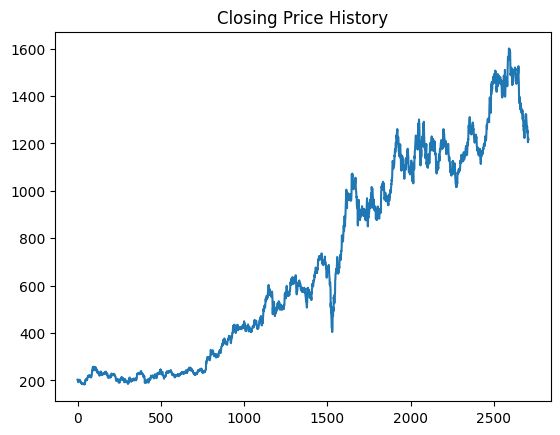

In [10]:

plt.title('Closing Price History')
plt.plot(df['Close'])

plt.show()
%matplotlib inline

In [12]:
ma100=df.Close.rolling(100).mean()
ma200=df.Close.rolling(200).mean()
ma100,ma200

(Ticker  RELIANCE.NS
 0               NaN
 1               NaN
 2               NaN
 3               NaN
 4               NaN
 ...             ...
 2703    1392.209001
 2704    1389.061002
 2705    1386.152502
 2706    1383.325752
 2707    1380.338252
 
 [2708 rows x 1 columns],
 Ticker  RELIANCE.NS
 0               NaN
 1               NaN
 2               NaN
 3               NaN
 4               NaN
 ...             ...
 2703    1434.798252
 2704    1433.396502
 2705    1432.229877
 2706    1431.039627
 2707    1429.661752
 
 [2708 rows x 1 columns])

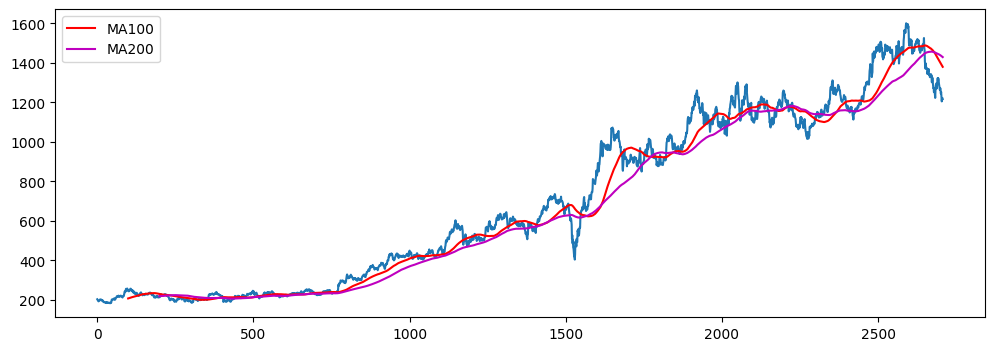

In [13]:
plt.figure(figsize=(12,4))
plt.plot(df.Close)
plt.plot(ma100,'r',label='MA100')
plt.plot(ma200,'m',label='MA200')
plt.legend()

In [14]:
len(df)*0.70

1895.6

#Splitting Data into training and test data



In [15]:
#Splitting training and test data
train_data=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
test_data=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
train_data,test_data

(Ticker  RELIANCE.NS
 0        203.164734
 1        200.010284
 2        197.553009
 3        195.427185
 4        192.489899
 ...             ...
 1890    1102.292358
 1891    1119.414062
 1892    1126.474976
 1893    1122.067627
 1894    1119.414062
 
 [1895 rows x 1 columns],
 Ticker  RELIANCE.NS
 1895    1094.469971
 1896    1093.039307
 1897    1097.585083
 1898    1120.613892
 1899    1103.238403
 ...             ...
 2703    1230.449951
 2704    1205.300049
 2705    1222.300049
 2706    1222.750000
 2707    1216.550049
 
 [813 rows x 1 columns])

([<matplotlib.lines.Line2D at 0x7b271f94e3b0>],
 [<matplotlib.lines.Line2D at 0x7b271f94fd90>])

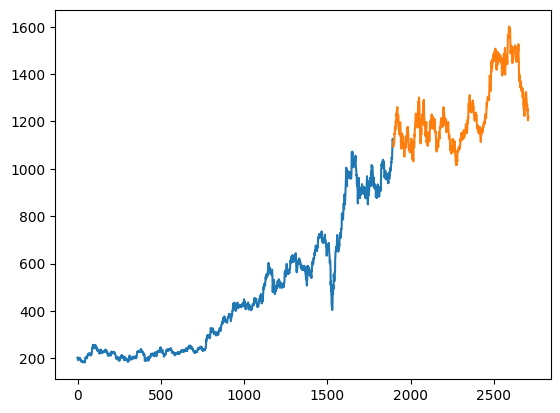

In [16]:
plt.plot(train_data),plt.plot(test_data)

In [17]:
train_data.shape,test_data.shape

((1895, 1), (813, 1))

In [18]:
train_data.head()

Ticker,RELIANCE.NS
0,203.164734
1,200.010284
2,197.553009
3,195.427185
4,192.489899


#Rescaling data

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [20]:
data_training_array=scaler.fit_transform(train_data)
data_training_array.shape

(1895, 1)

In [21]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])


x_train,y_train=np.array(x_train),np.array(y_train)

x_train.shape,y_train.shape

((1795, 100, 1), (1795,))

#ML Model

In [22]:
from keras import Sequential
from keras.layers import Dense,LSTM,Dropout

In [23]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 24s 300ms/step - loss: 0.0678
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 17s 296ms/step - loss: 0.0080
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 309ms/step - loss: 0.0070
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 17s 298ms/step - loss: 0.0055
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 311ms/step - loss: 0.0067
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 299ms/step - loss: 0.0051
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 304ms/step - loss: 0.0056
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 301ms/step - loss: 0.0049
Epoch 9/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 17s 298ms/step - loss: 0.0046
Epoch 10/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 17s 303ms/step - loss: 0.0045
Epoch 11/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 298ms/step - loss: 0.0044
Epoch 12/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 297ms/step - loss: 0.0064
Epoch 13/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 301ms/step - loss: 0.0044
Epoch 14/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 303ms/step - loss: 0.0040
Epoch 15/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 

In [44]:
model.save('my_model.keras')

In [25]:
past_100_days=train_data.tail(100)
final_df=pd.concat([past_100_days,test_data],ignore_index=True)
final_df.shape

(913, 1)

In [26]:
input_data=scaler.fit_transform(final_df)
input_data

array([[3.50763383e-04],
       [0.00000000e+00],
       [3.34870208e-03],
       [2.04114257e-03],
       [2.34091957e-02],
       [5.58122075e-02],
       [6.13296024e-02],
       [7.83922417e-02],
       [5.95436449e-02],
       [3.69317230e-02],
       [9.85478075e-03],
       [1.20873332e-02],
       [1.90399223e-02],
       [1.95183204e-02],
       [1.59782085e-02],
       [2.04113413e-02],
       [7.65420028e-03],
       [2.30584323e-02],
       [3.77609688e-02],
       [5.53656970e-02],
       [6.11701645e-02],
       [5.37391773e-02],
       [6.46783889e-02],
       [5.38986152e-02],
       [3.95469264e-02],
       [4.39480874e-02],
       [4.78071594e-02],
       [1.23520423e-01],
       [1.65299817e-01],
       [1.70785409e-01],
       [1.91419963e-01],
       [1.96777920e-01],
       [1.84563037e-01],
       [2.08099783e-01],
       [1.99935297e-01],
       [1.74676284e-01],
       [1.79779141e-01],
       [1.99010388e-01],
       [2.19262292e-01],
       [2.22515331e-01],


In [33]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

x_test, y_test = np.array(x_test), np.array(y_test)
x_test.shape,y_test.shape

((813, 100, 1), (813,))

In [28]:
scaler.scale_

array([0.00138213])

In [35]:
scale_factor=1/0.00138213
y_pred=model.predict(x_test)
y_pred.shape


26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step


(813, 1)

In [36]:
y_pred=y_pred*scale_factor
y_test=y_test*scale_factor
y_pred,y_test

(array([[132.63675],
        [141.0145 ],
        [149.82175],
        [158.09021],
        [165.44632],
        [171.65024],
        [176.65121],
        [180.54506],
        [183.54489],
        [186.16624],
        [189.11693],
        [193.23709],
        [199.19633],
        [207.16966],
        [216.80487],
        [227.31004],
        [237.91513],
        [248.37834],
        [258.1722 ],
        [266.85434],
        [274.86   ],
        [282.4976 ],
        [289.95322],
        [297.40225],
        [304.8725 ],
        [312.28226],
        [319.6299 ],
        [326.51834],
        [331.80954],
        [334.70377],
        [334.76218],
        [332.49673],
        [328.48608],
        [323.1649 ],
        [316.61063],
        [308.97485],
        [300.40002],
        [291.0833 ],
        [281.43567],
        [271.93826],
        [263.127  ],
        [255.66953],
        [250.2187 ],
        [247.49516],
        [247.74287],
        [250.32849],
        [253.83195],
        [256.

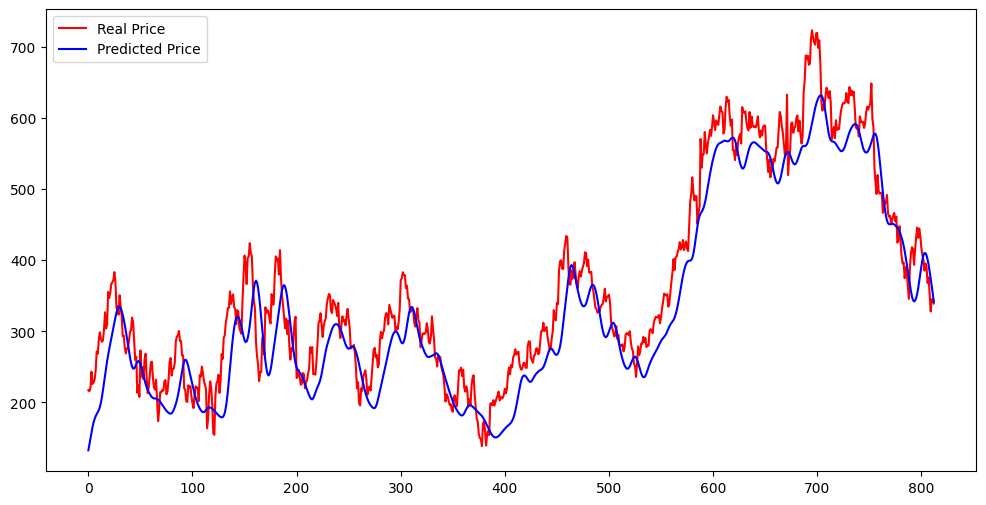

In [40]:
plt.figure(figsize=(12,6))
plt.plot(y_test,color='red',label='Real Price')
plt.plot(y_pred,color='blue',label='Predicted Price')
plt.legend()

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming y_test and y_pred are your actual and predicted values respectively
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

model.save('stock_price_prediction.h5')

Mean Squared Error (MSE): 2535.818440232124
Root Mean Squared Error (RMSE): 50.35691055090775
Mean Absolute Error (MAE): 41.32452673602229
R-squared (R2): 0.868948506041596
